In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
data1 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\1.txt', delimiter = ',')
data2 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\2.txt', delimiter = ',')
data3 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\3.txt', delimiter = ',')
data4 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\4.txt', delimiter = ',')
data5 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\5.txt', delimiter = ',')
data7 =np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\7.txt', delimiter = ',')

<IPython.core.display.Javascript object>


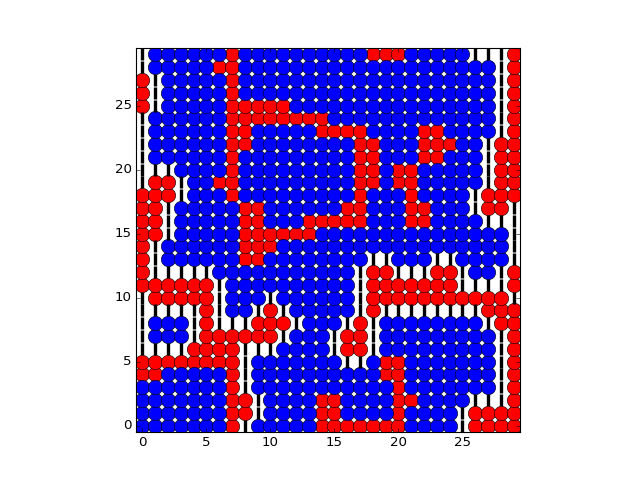

In [4]:
fig, ax = plt.subplots()
ax.set_xlim(-0.5, data3.shape[0]-0.5)
ax.set_ylim(-0.5, data3.shape[1]-0.5)

ax.axes.set_aspect('equal')
y0,x0 = np.nonzero(data3==0)
y1,x1 = np.nonzero(data3==1)
y3,x3 = np.nonzero(data3==3)
y4,x4 = np.nonzero(data3==4)
ax.plot(x0,y0, 'ro', ms=13)
ax.plot(x1,y1, 'bo', ms=13)
ax.plot(x3,y3, 'k|', mew='3', ms=10)
ax.plot(x4,y4, 'k|', mew='3', ms=10)

In [13]:
Понятие "Граница"
Пусть на решетке имеются протекающие кластеры обоих типов(по клеткам которых можно пройти от верхней границы 
решетки к нижней), тогда границей является множество кооператоров, у которых хотя бы одна соседняя клетка является элементом
протекающего кластера дефекторов. На решетке может быть несколько границ, расчет границы начинается с нижней грани решетки
первого элемента границы. Дальше делаем шаг на элемент границы среди соседей следующим способом. Проверяем соседей по часовой 
стрелке, начиная с верхнего левого и не учитывая соседа, откуда был сделан шаг. Таким образом, размер границы - это количество
клеток, по которым мы прошлись.

In [30]:
plt.plot?

<IPython.core.display.Javascript object>


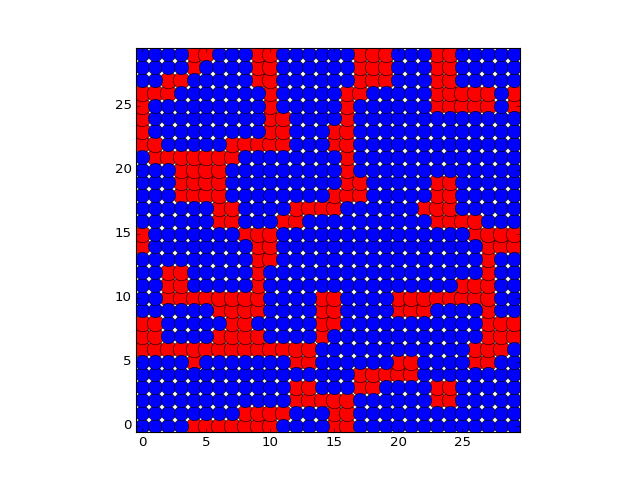

In [27]:
fig, ax = plt.subplots()
ax.set_xlim(-0.5, data7.shape[0]-0.5)
ax.set_ylim(-0.5, data7.shape[1]-0.5)

ax.axes.set_aspect('equal')
y0,x0 = np.nonzero(data7==0)
y1,x1 = np.nonzero(data7==1)
ax.plot(x0,y0, 'ro', ms=15)
ax.plot(x1,y1, 'bo', ms=13)

In [9]:
import itertools


In [7]:
def neighb(x, y, Lx, Ly):
    """4-neighbors of (x, y)."""
    if x > 0:
        yield -1, 0
    if x < Lx-1:
        yield 1, 0
    if y > 0:
        yield 0, -1
    if y < Ly-1:
        yield 0, 1

In [8]:
def segment(x, y, dx, dy):
    """Coords of endpoints of the segment orthogonal to the bond (x,y) -> (x+dx, y+dy)."""
    a, b = (dx + dy) / 2., (dx - dy)/2.
    #return [(x + a, y + b),
    #         (x - b, y + a)]
    ###return [x + a, x - b], [y + b, y + a]
    return [x + a, x + b], [y + a, y - b]

<IPython.core.display.Javascript object>


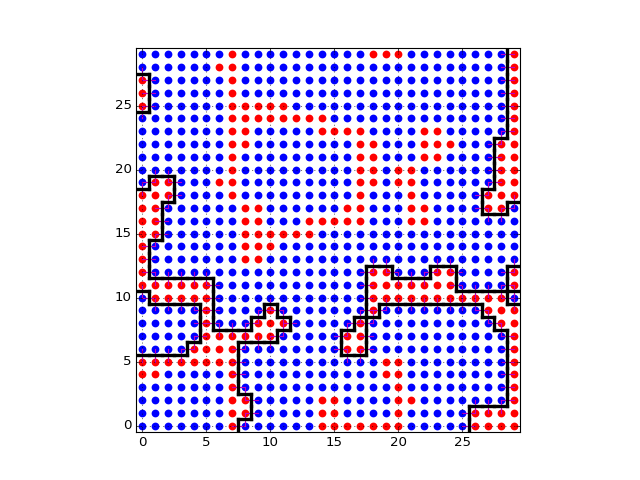

(-0.5, 29.5)

In [20]:
sz = data3.shape[0]
ddd = data3[:sz, :sz]

y0, x0 = np.nonzero(ddd==0)
plt.plot(x0, y0, 'ro', mec='none', ms=7)

y1, x1 = np.nonzero(ddd != 0)
plt.plot(x1, y1, 'bo', mec='none', ms=7)  # NB: all non-zero, not original blue 

ll = list(range(ddd.shape[0]))
for xb, yb in itertools.product(ll, repeat=2):
    if data3[xb, yb] == 0:      
        for dx, dy in neighb(xb, yb, *data3.shape):
            if data3[xb+dx, yb+dy] == 3 or data3[xb+dx, yb+dy] == 4:
                # boundary bond, draw it
                plt.plot([yb, yb+dy], [xb, xb+dx], 'm-')     # NB: transpose y, x
                xx, yy = segment(xb, yb, dx, dy)
                plt.plot(yy, xx, 'k-', lw=3)              # Ditto

plt.grid(True)
plt.gca().set_aspect('equal')
plt.xlim(-0.5, sz-0.5)
plt.ylim(-0.5, sz-0.5)